$\require{cancel}  \require{bbox} \require{color} \require{enclose} \require{AMSmath} \require{AMSsymbols} \require{sinuitx} \require{mhchem}$
<div style="display:inline-block; position:absolute; top:0; right:0; color: #230e3e; font:italic 1em serif;">$\LaTeX$<span style="display:inline-block; vertical-align:bottom"><a href="https://www.mathjax.org">
    <img style="height:1.25em" title="Powered by MathJax"
    src="https://www.mathjax.org/badge/mj_logo.png"
    border="0" alt="Powered by MathJax" />
</a></span> </div>

<header style="background-color:#e7e2ee; color:#461d7c; line-height:2em; padding-left:1em; padding-right:1em; bottom:0; float:bottom; text-align:right; float:right; font-family:serif; font-size:small;">Problem 4-68 ⋮ Çengel, Y. A., and Boles, M. A. (2001). <i>Thermodynamics: An Engineering Approach.</i> Boston: McGraw-Hill.</header>  



## Problem 4-68

### Given   
A spring-loaded piston-cylinder device contains 1 kg of carbon dioxide. This system is heated from 100 kPa and 25°C to 1000 kPa and 300°C. 


### Find 
Determine  
$\quad$ (a) $Q_{in}$   
$\quad$ (b) $W_{out}$


In [1]:
using Plots
using Unitful

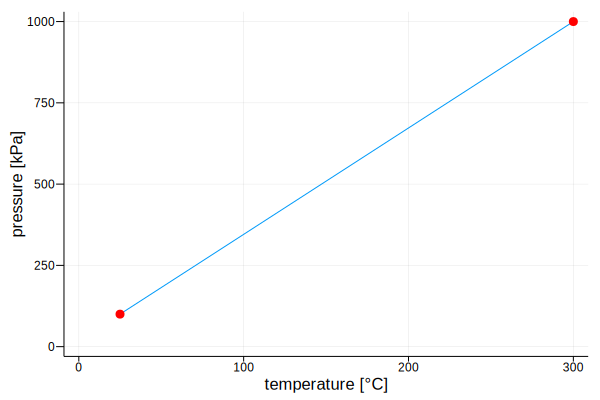

In [2]:
# Julia does plots, too
plot([25,300],[100,1000], label = "", 
    xlabel="temperature [°C]", 
    ylabel="pressure [kPa]",
    xlim=[0,300], ylim=[0,1000], 
    tick_direction= :out)
scatter!([25,300],[100,1000],   # the ! means we're appending to the existing plot
    markershape = :circle,
    markercolor = :red,
    markerstrokecolor = :red,
    label = "")

### Get Organized

![figure, cb8, 4-69](./figures/ch04_cen98179_p04068_lg.jpg)

These things you should notice right away:
1. Closed system ⋮ constant mass.  
1. Here is a free-body diagram of our piston. 
  ![figure, cb8, 4-69, free body diagram](./figures/cb8,4-068fbd.png)
  1. State 1 force balance:     
  $$ {\ } \\ P_1A - W_\ce{piston} - F_\text{spring,1} - P_\ce{atm}A = 0 \\ {}$$
  1. State 2 force balance:   
  $$ {\ }\\ \big(P_1 + \Delta P\big)A - W_\ce{piston} - \big( F_\text{spring,1} + \Delta F_\text{spring} \big) - P_\ce{atm}A = 0 \\[12pt] 
  \Delta PA = \Delta F_\text{spring} = k_\ce{spring} \Delta z = k_\ce{spring} \frac{\Delta V}{A} \\[6pt] $$
    The important thing here is that our pressure changes linearly with volume. $\quad \\ \quad$

### Attack

#### (a) Find $W_{out}$   


![pv diagram](./figures/cb8,4-068pvdiagram.png)
    From here, you find your boundary work by integrating, either algebraically or graphically. Either way,
    $$\ \\ W_{b,out} = \int^2_1 P\,{\rm d}V 
         =\textstyle \frac{1}{2}\big(P_1 + P_2 \big)\big( V_2 - V_1 \big) \\
         PV = mRT \\
         m = \ce{1kg} \\ 
         R = \frac{\overline{R}}{\textbf{MW}_{\ce{CO2}}} = \frac{8.314\,\text{kJ/kmol$\cdot$K}}{44.01\,\text{kJ/kg}}\\[12pt]$$



In [3]:
m = 1u"kg"

R̄ = u"R"
MW_CO₂ = 44.01u"kg/kmol"
R_CO₂ = R̄/MW_CO₂ 

P1 = 100u"kPa"
P2 = 1u"MPa"

T1 = (25  + 273.1)u"K"
T2 = (300 + 273.1)u"K"

V1 = m*R_CO₂*T1/P1
V2 = m*R_CO₂*T2/P2

W_out = (P1 + P2)*(V2 - V1)/2 |> u"kJ"

-250.1980685307465 kJ

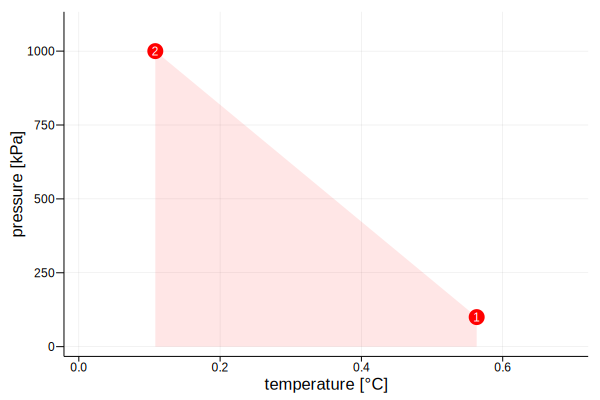

In [4]:
VV1 = V1 |> u"m^3" |> ustrip; VV2 = V2 |> u"m^3" |> ustrip; 
PP1 = P1 |> u"kPa" |> ustrip; PP2 = P2 |> u"kPa" |> ustrip;

scatter!([(VV1,PP1),(VV2,PP2)], markersize=8, markercolor = :red, 
    markershape = :circle, markerstrokecolor = :red, 
    fill = (0, 0.1, :red), label="", ylabel="pressure [kPa]", )
annotate!([(VV1,PP1,Plots.text("1",8,:center,:white)),(VV2,PP2,Plots.text("2",8,:center,:white))] ,
ylim=[0,1100], xlim=[0,0.7])



<div class="panel-success"><div class="panel-heading">   

$$(a)\ W_{in} = 250.20\,\ce{kJ}$$

</div>


#### (a) Find $Q_{in}$  

Employ the First Law, as usual:

\begin{array}{c}
  E_{in} &-& E_{out} &=& \Delta E_{sys} \\
  Q_{in} &-& W_{out} &=& m \big( u_2 - u_1 \big) &=& m \displaystyle \frac{ \bar{u}_2 - \bar{u}_1 }{\textbf{MW}_{\ce{CO2}}} \\
\end{array}

$$ Q_{in} = W_{out} + m  \frac{ \bar{u}_2 - \bar{u}_1 }{\textbf{MW}_{\ce{CO2}}}$$

In [5]:
ū1 = 6885u"kJ/kmol"       # table
ū2 = 16251.96u"kJ/kmol"   # table

Q_in = W_out + m*(ū2 - ū1)/MW_CO₂ |> u"kJ"

-37.360986049492254 kJ

<div class="btn-success">&nbsp;<div class="badge"></div><i class="fa fa-spin fa-fw fa-cog"></i><strong> Finis</strong></div>
<div class="panel-success"><div class="panel-heading"><div class="badge"></div> 

$$ (b) \ Q_{out} = 37.36 \,\ce{kJ} $$




</div></div>

<footer style="background-color: #461d7c; color:rgba(253,208,35,0.35); line-height:2em; padding-left:1em; padding-right:0.5em; bottom:0; float:bottom; text-align:right;"><i>ψᵟ</i></footer>